In [58]:
#import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [120]:
#load dataframe
df = pd.read_pickle('album_df.pkl')

In [121]:
df.head()

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_speechiness,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,Score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genres
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,0.162290,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,4,80.0,7.8,79,True,1.0,10.0,Rap
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,0.041812,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,4,7.0,7.4,79,False,1.0,11.0,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,0.007601,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,5,45.0,8.4,1,False,1.0,11.0,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,0.057550,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,4,66.0,7.4,79,False,1.0,11.0,Pop/R&B
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.008499,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4,4.0,7.1,79,True,1.0,9.0,ElectronicRock


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 007DWn799UWvfY1wwZeENR to 7zgo8oFUtR2cVQbhDZ0o6V
Data columns (total 22 columns):
album_run_time_ms        1604 non-null float64
number_of_tracks         1604 non-null float64
std_in_energy            1600 non-null float64
std_in_speechiness       1600 non-null float64
danceability_mean        1604 non-null float64
acousticness_mean        1604 non-null float64
instrumentalness_mean    1604 non-null float64
loudness_mean            1604 non-null float64
tempo_mean               1604 non-null float64
energy_amax              1604 non-null float64
liveness_amax            1604 non-null float64
speechiness_amax         1604 non-null float64
valence_amax             1604 non-null float64
tempo_amax               1604 non-null float64
time_signature_amax      1604 non-null int64
popularity_amax          1604 non-null float64
Score_amax               1604 non-null float64
num_markets_amax         1604 non-null int64
is_explicit_amax 

In [62]:
#drop target variable
data_pred = df.drop(['Score_amax'], axis = 1)


In [20]:
data_pred.head()


,album_run_time_ms,number_of_tracks,std_in_energy,std_in_speechiness,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,genres
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,0.162290,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,4,80.0,79,True,1.0,10.0,Rap
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,0.041812,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,4,7.0,79,False,1.0,11.0,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,0.007601,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,5,45.0,1,False,1.0,11.0,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,0.057550,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,4,66.0,79,False,1.0,11.0,Pop/R&B
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.008499,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4,4.0,79,True,1.0,9.0,ElectronicRock


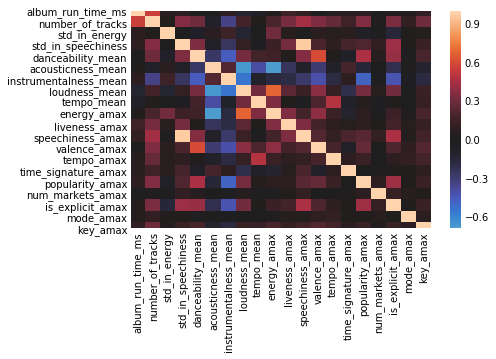

In [21]:
#look at heatmap
sns.heatmap(data_pred.corr(), center=0)

In [22]:
#check for multicoliniar features above 0.75
abs(data_pred.corr()) > 0.75

,album_run_time_ms,number_of_tracks,std_in_energy,std_in_speechiness,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax
album_run_time_ms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number_of_tracks,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_energy,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
std_in_speechiness,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
danceability_mean,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
acousticness_mean,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
instrumentalness_mean,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
loudness_mean,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
tempo_mean,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
energy_amax,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [23]:
#drop multicolinear variables and genres(going to get dummies)
data_pred = data_pred.drop(['std_in_speechiness', 'genres', 'is_explicit_amax'], axis = 1)

In [14]:
#initialize minmax scaler and scale data
min_max_scaler = preprocessing.MinMaxScaler()
data_pred[:] = min_max_scaler.fit_transform(data_pred[:])

In [24]:
data_pred.head()

,album_run_time_ms,number_of_tracks,std_in_energy,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,num_markets_amax,mode_amax,key_amax
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,4,80.0,79,1.0,10.0
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,4,7.0,79,1.0,11.0
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,5,45.0,1,1.0,11.0
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,4,66.0,79,1.0,11.0
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4,4.0,79,1.0,9.0


In [25]:
#get dummies for genre column
gen_dummies = pd.get_dummies(df['genres'], prefix='genre', drop_first=True)
explicit_dummies = pd.get_dummies(df['is_explicit_amax'], prefix='explicit', drop_first=True)

In [26]:
#rename columns to avoid error
gen_dummies.rename(columns={'genre_Folk/Country':'genre_Folk_Country', 'genre_Pop/R&B':'genre_Pop_RnB'}, inplace=True)

In [27]:
#isolate target variable
score = df['Score_amax']


In [28]:
#create final dataframe with scaled data, dummies, and target
df_fin = pd.concat([data_pred, gen_dummies, explicit_dummies, score], axis=1)

In [29]:
df_fin.head()

,album_run_time_ms,number_of_tracks,std_in_energy,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,tempo_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,num_markets_amax,mode_amax,key_amax,genre_ElectronicRock,genre_Experimental,genre_ExperimentalElectronic,genre_ExperimentalRock,genre_Folk_Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop_RnB,genre_Rap,genre_Rock,explicit_True,Score_amax
007DWn799UWvfY1wwZeENR,3065169.0,15.0,0.072424,0.871667,0.046364,0.000119,-7.147600,126.265133,0.695,0.454,0.5510,0.963,173.368,4,80.0,79,1.0,10.0,0,0,0,0,0,0,0,0,0,1,0,1,7.8
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.185253,0.724300,0.374767,0.532800,-15.015700,100.700800,0.697,0.896,0.1460,0.874,120.006,4,7.0,79,1.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,7.4
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.073569,0.443889,0.957778,0.205918,-13.239333,118.242111,0.268,0.161,0.0512,0.342,207.893,5,45.0,1,1.0,11.0,0,0,0,0,1,0,0,0,0,0,0,0,8.4
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.204683,0.562154,0.464462,0.011059,-6.111769,124.775154,0.911,0.570,0.2120,0.782,203.911,4,66.0,79,1.0,11.0,0,0,0,0,0,0,0,0,1,0,0,0,7.4
01ey0ETPITd3jiOiztRXzK,2840581.0,16.0,0.141410,0.377625,0.406806,0.049877,-12.121375,105.696000,0.697,0.355,0.0607,0.543,181.821,4,4.0,79,1.0,9.0,1,0,0,0,0,0,0,0,0,0,0,1,7.1


In [47]:
#X = df_fin.drop('Score_amax', axis=1)  
y = df_fin['Score_amax']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [46]:
X = np.nan_to_num(X)

In [43]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [55]:
regressor = DecisionTreeRegressor(random_state=42)  
regressor.fit(X_train, y_train) 




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [56]:
y_pred = regressor.predict(X_test) 
# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)


Mean Absolute Error: 0.974454828660436
Mean Squared Error: 1.8307788161993772
Root Mean Squared Error: 1.353062753976835


-1.0115734747594267

In [57]:
y_pred2 = regressor.predict(X_train) 
# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred2))  
print('Mean Squared Error:', mean_squared_error(y_train, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred2)))
r2_score(y_train, y_pred2)

Mean Absolute Error: 1.453760468721951e-17
Mean Squared Error: 1.2911986757319757e-32
Root Mean Squared Error: 1.1363092342016655e-16


1.0

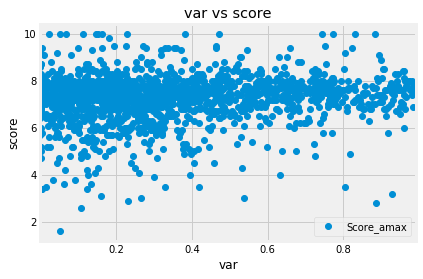

In [81]:
# baseline model
df.plot(x='acousticness_mean', y='Score_amax', style='o')  
plt.title('var vs score')  
plt.xlabel('var')  
plt.ylabel('score')  
plt.show()

In [123]:
X = df[['popularity_amax', 'number_of_tracks', 'acousticness_mean']].values
y = df['Score_amax'].values

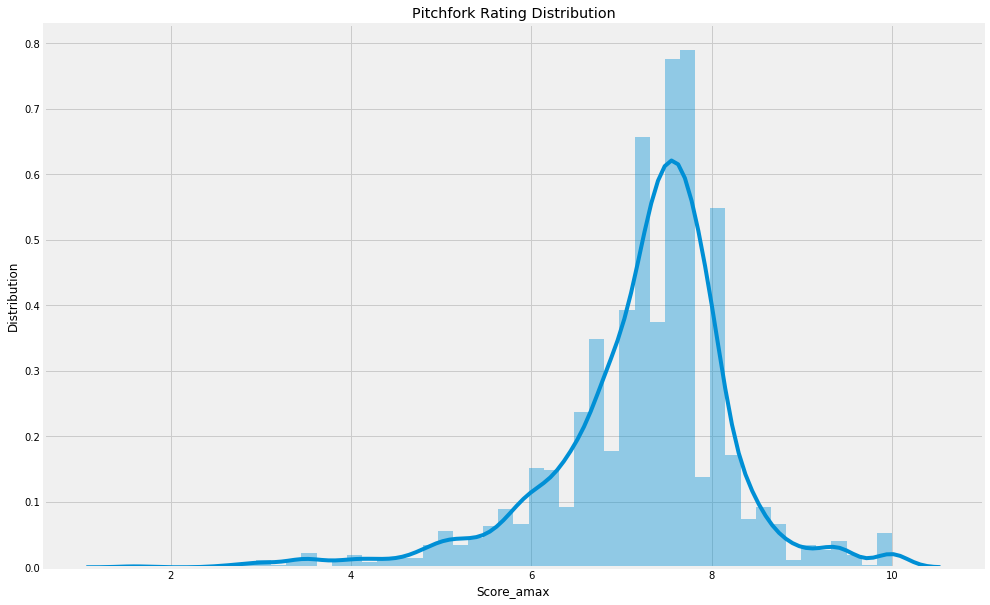

In [128]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title('Pitchfork Rating Distribution')
plt.ylabel('Distribution')
plt.xlabel('Rating')
sns.distplot(df['Score_amax'])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [125]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
coeff_df = pd.DataFrame(regressor.coef_)  
coeff_df

,0
0,4.697266e-01
1,7.338815e-08
2,2.879524e-01


In [126]:
y_pred =regressor.predict(X_test)

In [116]:
y_test.mean()

7.216199376947039

In [117]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': 7.216199376947039})
df.head(25)

,Actual,Predicted
0,8.8,7.216199
1,6.8,7.216199
2,7.4,7.216199
3,7.4,7.216199
4,6.8,7.216199
5,7.6,7.216199
6,7.7,7.216199
7,7.0,7.216199
8,7.8,7.216199
9,7.1,7.216199


In [118]:
print('Mean Absolute Error:', mean_absolute_error(y_test, df['Predicted']))  
print('Mean Squared Error:', mean_squared_error(y_test, df['Predicted']))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, df['Predicted'])))

Mean Absolute Error: 0.6947409283683197
Mean Squared Error: 0.9837251191273375
Root Mean Squared Error: 0.9918291784008664


In [127]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6890363488149267
Mean Squared Error: 0.9770145030791242
Root Mean Squared Error: 0.9884404398238288
